<a href="https://colab.research.google.com/github/fboldt/aulasann/blob/main/aula05b_cost_functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt

def plotDataset(X, y):
  plt.scatter(X[:,0], X[:,1], c=y)
  plt.xlim(0, 1)
  plt.ylim(0, 1)

In [4]:
import numpy as np

def plotHiperplano(vector, intercept=0):
  xs = np.array([0, 1])
  ys = -(vector[0]*xs+intercept)/vector[1]
  plt.plot(xs, ys, 'r-')

In [5]:
def criaDataset(n=20, slop=[2,1], intercept=-0.4):
  X = np.random.uniform(size=(n,2))
  AUX = X * np.array(slop) - [0, intercept]
  y = np.array(AUX[:,0]>AUX[:,1], dtype=int)*2-1
  return X, y

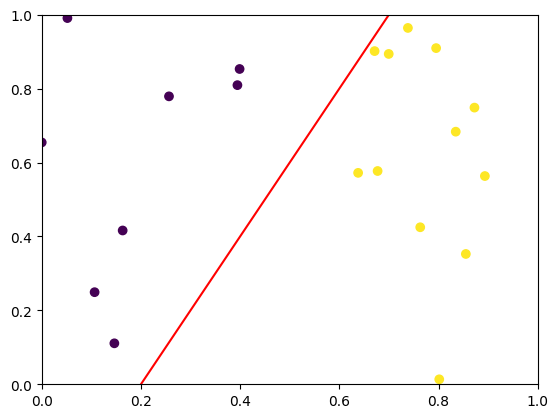

In [9]:
X, y = criaDataset()
plotDataset(X, y)
plotHiperplano([2, -1], -0.4)
plt.show()

In [166]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import accuracy_score

def sign(a):
  return (a>=0)*2-1

def include_bias(X):
  bias = np.ones((X.shape[0], 1))
  Xb = np.concatenate((bias, X), axis=1)
  return Xb

In [135]:
from abc import ABC, abstractmethod, abstractstaticmethod

class Cost(ABC):
  @abstractstaticmethod
  def getCost(y, ypred):
    pass
  @abstractstaticmethod
  def getGradient(y, ypred):
    pass

class WidrowHoff(Cost):
  @staticmethod
  def getCost(y, ypred):
    return 0.5 * (y - ypred) ** 2
  @staticmethod
  def getGradient(y, ypred, X):
    return X.T @ (y - ypred)

In [136]:
class TrainingAlgorithm(ABC):
  @abstractmethod
  def getW(self, X, y):
    pass

class GradientDescent(TrainingAlgorithm):
  def __init__(self, learning_rate=0.05, n_iter=100, cost=WidrowHoff()):
    self.learning_rate = learning_rate
    self.n_iter = n_iter
    self.cost = cost

  def getW(self, X, y):
    w = np.random.uniform(size=X.shape[1])*2-1
    for _ in range(self.n_iter):
      ypred = X @ w
      error = y-ypred
      w += self.learning_rate * self.cost.getGradient(y, ypred, X)
    return w

[-1.39141221  3.00685532 -0.04107514]
1.0


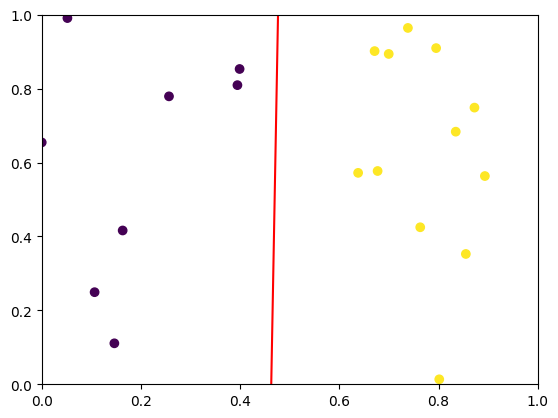

In [139]:
class Perceptron(BaseEstimator, ClassifierMixin):
  def __init__(self, trainingAlgorithm=GradientDescent()):
    self.trainingAlgorithm = trainingAlgorithm

  def fit(self, X, y):
    Xb = include_bias(X)
    self.w = self.trainingAlgorithm.getW(Xb, y)
    return self

  def predict(self, X):
    Xb = include_bias(X)
    return sign(Xb @ (self.w))

widrowhoff_model = Perceptron()
widrowhoff_model.fit(X, y)
ypred = widrowhoff_model.predict(X)
print(widrowhoff_model.w)
print(accuracy_score(y, ypred))
plotDataset(X, y)
plotHiperplano(widrowhoff_model.w[1:], widrowhoff_model.w[0])
plt.show()

# cost functions

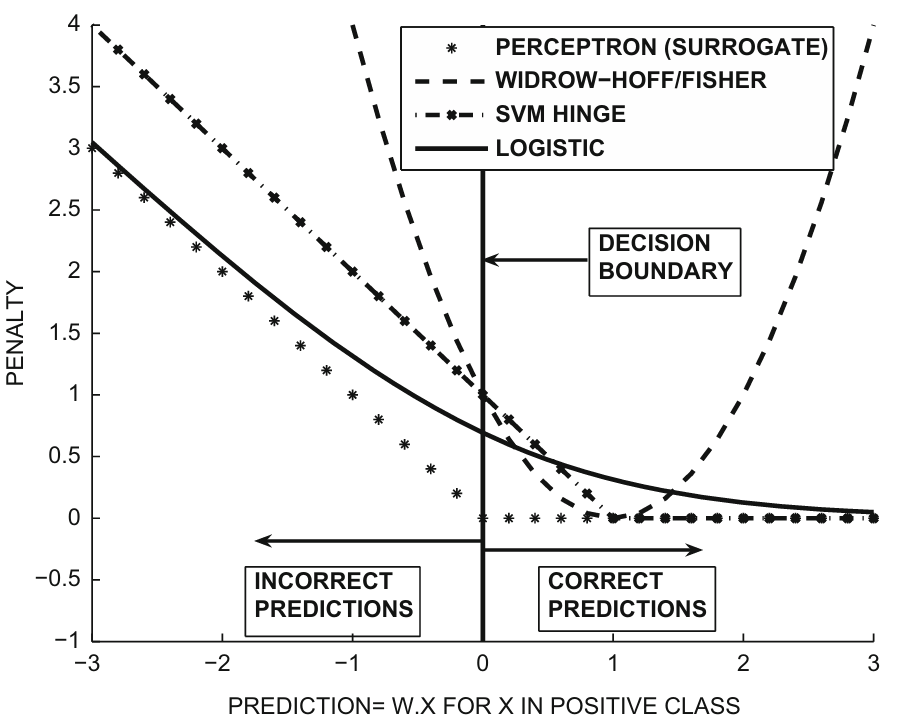

[-0.68979335  1.23959208  0.06934561]
1.0


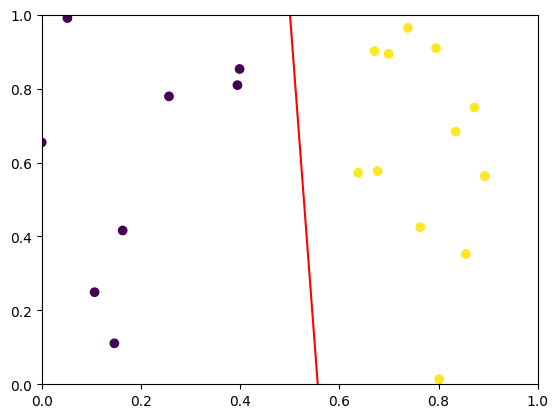

In [150]:
class SmoothedSurrogate(Cost):
  @staticmethod
  def getCost(y, ypred):
    return np.sum(np.maximum(np.zeros(y.shape), -y * ypred))
  @staticmethod
  def getGradient(y, ypred, X):
    return X.T @ (y - sign(ypred))

smoothedsurrogate_model = Perceptron(GradientDescent(cost=SmoothedSurrogate()))
smoothedsurrogate_model.fit(X, y)
ypred = smoothedsurrogate_model.predict(X)
print(smoothedsurrogate_model.w)
print(accuracy_score(y, ypred))
plotDataset(X, y)
plotHiperplano(smoothedsurrogate_model.w[1:], smoothedsurrogate_model.w[0])
plt.show()

[-2.17792592  5.9326749  -1.0754484 ]
1.0


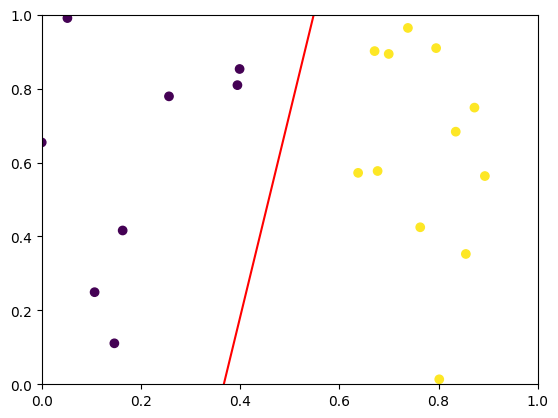

In [158]:
class HingeLoss(Cost):
  @staticmethod
  def getCost(y, ypred):
    return np.sum(np.maximum(np.zeros(y.shape), 1 - y*ypred))
  @staticmethod
  def getGradient(y, ypred, X):
    marginalserrors = (y * ypred) < 1
    marginal_ys = np.copy(y)
    marginal_ys[~marginalserrors] = 0
    return X.T @ marginal_ys

hingeloss_model = Perceptron(GradientDescent(cost=HingeLoss()))
hingeloss_model.fit(X, y)
ypred = hingeloss_model.predict(X)
print(hingeloss_model.w)
print(accuracy_score(y, ypred))
plotDataset(X, y)
plotHiperplano(hingeloss_model.w[1:], hingeloss_model.w[0])
plt.show()

In [159]:
a = np.linspace(-10, 10, 100)

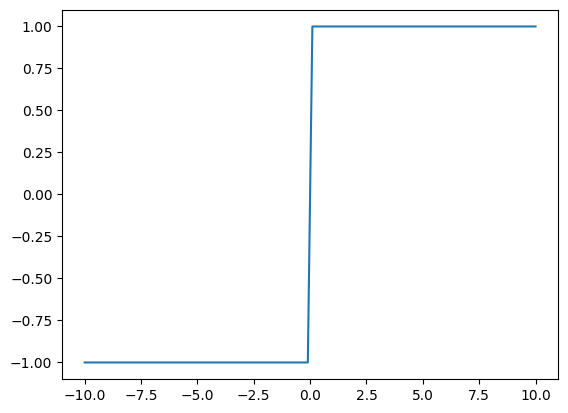

In [163]:
_ = plt.plot(a, sign(a))

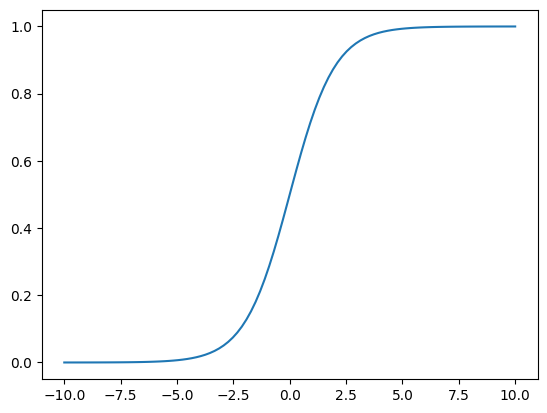

In [164]:
def sigmoid(a):
  return 1/(1+np.exp(-a))

_ = plt.plot(a, sigmoid(a))

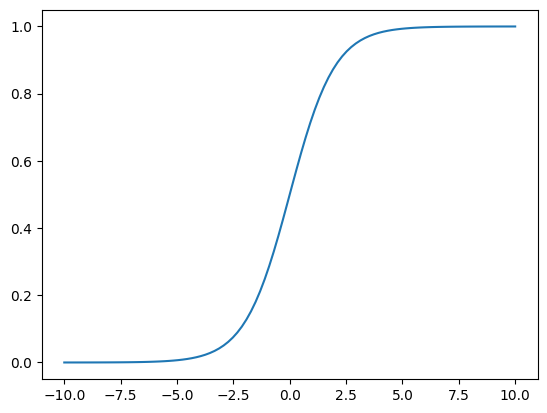

In [178]:
from scipy.special import expit

_ = plt.plot(a, expit(a))

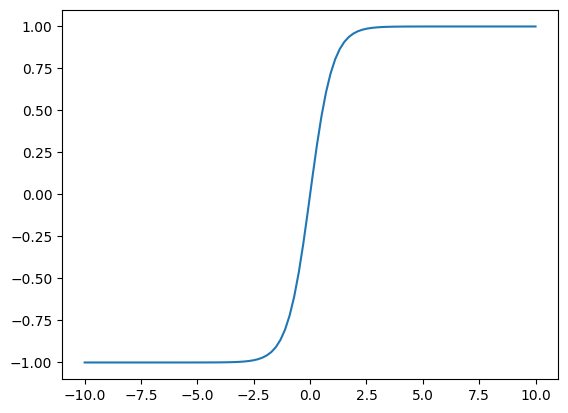

In [180]:
def tanh(a):
  return (np.exp(a)-np.exp(-a))/(np.exp(a)+np.exp(-a))

_ = plt.plot(a, tanh(a))

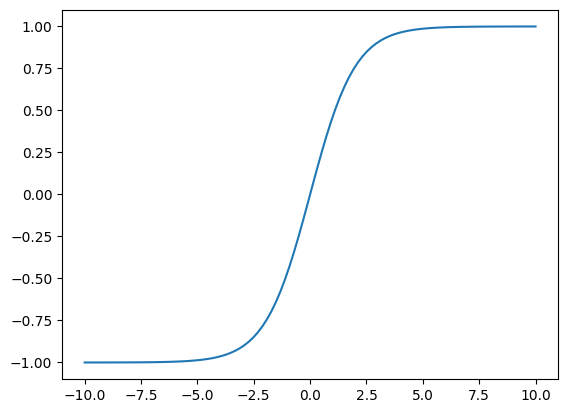

In [182]:
def tanh_fake(a):
  return expit(a)*2-1

_ = plt.plot(a, tanh_fake(a))

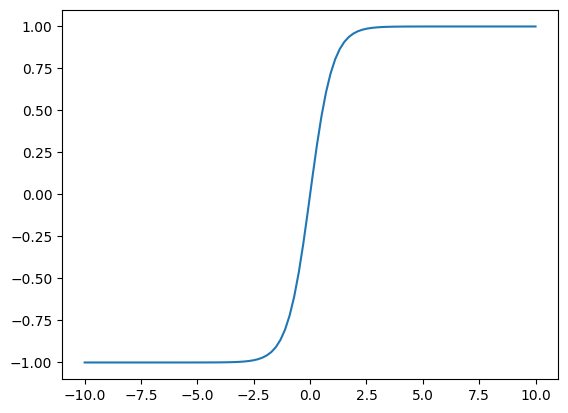

In [183]:
from numpy import tanh

_ = plt.plot(a, tanh(a))

[-2.12744574  5.53220732 -0.72887984]
1.0


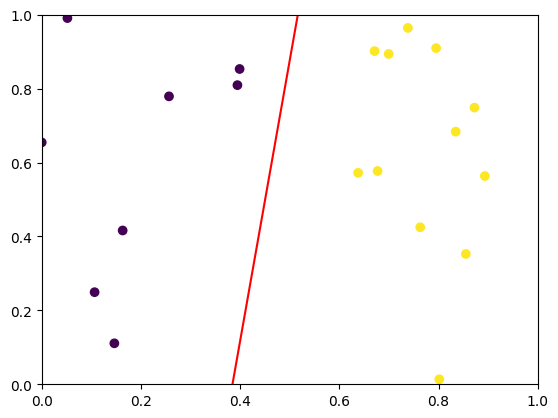

In [187]:
class LogLikehood(Cost):
  @staticmethod
  def getCost(y, ypred):
    return np.sum(np.maximum(np.zeros(y.shape), 1 - y * ypred))
  @staticmethod
  def getGradient(y, ypred, X):
    return X.T @ (y - tanh(ypred))

loglikehood_model = Perceptron(GradientDescent(cost=LogLikehood()))
loglikehood_model.fit(X, y)
ypred = loglikehood_model.predict(X)
print(loglikehood_model.w)
print(accuracy_score(y, ypred))
plotDataset(X, y)
plotHiperplano(loglikehood_model.w[1:], loglikehood_model.w[0])
plt.show()

In [216]:
Xtest, ytest = criaDataset(1000)

In [223]:
models = [widrowhoff_model, smoothedsurrogate_model, hingeloss_model, loglikehood_model]

for model in models:
  model.fit(X, y)
  ypred = model.predict(Xtest)
  print(f"{model.trainingAlgorithm.cost.__class__}:",accuracy_score(ytest, ypred))

<class '__main__.WidrowHoff'>: 0.889
<class '__main__.SmoothedSurrogate'>: 0.935
<class '__main__.HingeLoss'>: 0.931
<class '__main__.LogLikehood'>: 0.92
